In [1]:
import pandas as pd
import numpy as np
import sklearn.linear_model
import sklearn.model_selection
import sklearn.metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df = pd.read_csv('/home/axel/Projects/politics/polls-vs-votes/wisconsin.csv')

In [40]:
df = df.iloc[3:]

In [41]:
df

,Year,State,D-Polls,R-Polls,Other-Polls,D-Actual,R-Actual,Turnout,D%,R%,Turnout%,final_margin
3,2000,Wisconsin,NaN,NaN,NaN,1242987.0,1237279.0,NaN,NaN,NaN,NaN,NaN
4,2004,Wisconsin,0.460,0.490,0.050,1489504.0,1478120.0,2997007.0,0.496997,0.493199,0.7290,0.003798
5,2008,Wisconsin,0.528,0.418,0.054,1677211.0,1262393.0,2983417.0,0.562178,0.423137,0.6920,0.139041
6,2012,Wisconsin,0.504,0.462,0.034,1620985.0,1407966.0,3068434.0,0.528278,0.458855,0.7035,0.069423
7,2016,Wisconsin,0.468,0.403,0.129,1382536.0,1405284.0,2976150.0,0.464538,0.472182,0.6734,-0.007643
8,2020,Wisconsin,0.500,0.439,0.061,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
df['final_margin'] = df['D%'] - df['R%']

In [43]:
df.index = df['Year']

Text(0.5, 1.0, 'Wisconsin')

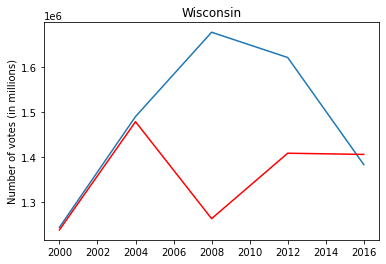

In [44]:
fig, ax = plt.subplots()
ax.plot(df['D-Actual'])
ax.plot(df['R-Actual'], c='red')
ax.set_ylabel("Number of votes (in millions)")
ax.set_title("Wisconsin")

In [45]:
df = df.reset_index(drop=True)

Text(0.5, 1.0, 'Wisconsin')

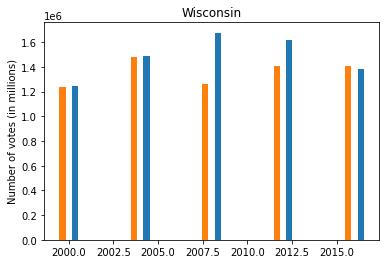

In [46]:
width = 0.35
fig, ax = plt.subplots()
ax.bar(x=df['Year']+width, height=df['D-Actual'], width=width)
ax.bar(x=df['Year']-width, height=df['R-Actual'], width=width)
ax.set_ylabel("Number of votes (in millions)")
ax.set_title("Wisconsin")

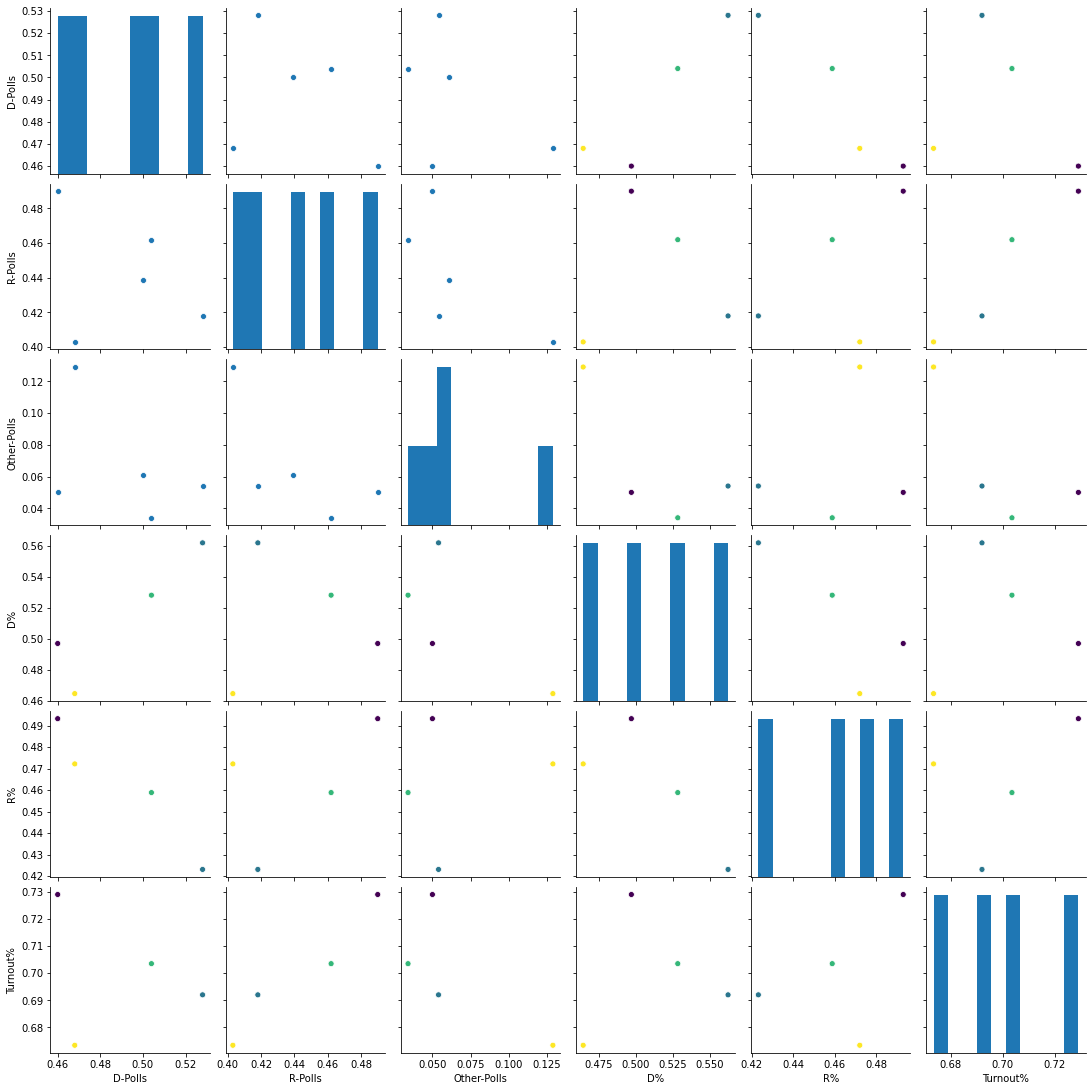

In [47]:
sns.pairplot(df[['D-Polls', 'R-Polls', 'Other-Polls','D%', 'R%', 'Turnout%']])

In [305]:
X = df[['D-Polls', 'R-Polls', 'Other-Polls','Turnout%']].iloc[:-1,:].values
y = df[['D%', 'R%']].iloc[:-1,:].values

In [306]:
kfolds = sklearn.model_selection.KFold(n_splits=4)

In [307]:
elastic_net = sklearn.linear_model.MultiTaskElasticNetCV(
    l1_ratio=[0.0001, 0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    cv=kfolds,
    normalize=True
)
elastic_net = elastic_net.fit(X,y)

In [308]:
min_mse = 100
count = 0
min_count = 0
mse_list = []
elastic_net_model = None
for mse in elastic_net.mse_path_:
    for mse_2 in mse:
        mean_mse = mse_2.mean()
        if mean_mse < min_mse:
            min_mse = mean_mse
            min_count = count
        count += 1
        print(mean_mse, min_mse, count)
        mse_list.append(mean_mse)

0.001745176162906636 0.001745176162906636 1
0.0017452839413807843 0.001745176162906636 2
0.0017454046935532087 0.001745176162906636 3
0.001745618896678756 0.001745176162906636 4
0.0017458360436404287 0.001745176162906636 5
0.0017460687255589087 0.001745176162906636 6
0.0017462920020928662 0.001745176162906636 7
0.001746300611684272 0.001745176162906636 8
0.001746309794018921 0.001745176162906636 9
0.0017463195830541016 0.001745176162906636 10
0.001746359221339956 0.001745176162906636 11
0.0017464190615402173 0.001745176162906636 12
0.0017465460226767065 0.001745176162906636 13
0.0017466849721464747 0.001745176162906636 14
0.0017468329487573477 0.001745176162906636 15
0.0017469910536020707 0.001745176162906636 16
0.0017471599346293276 0.001745176162906636 17
0.0017473402742093256 0.001745176162906636 18
0.0017475327898066515 0.001745176162906636 19
0.0017477382344406349 0.001745176162906636 20
0.0017479573968814995 0.001745176162906636 21
0.0017481911015219528 0.001745176162906636 22
0.

0.0016483279167631727 0.0015767267142747655 223
0.001651124882653605 0.0015767267142747655 224
0.0016495302438021726 0.0015767267142747655 225
0.0016492720964750897 0.0015767267142747655 226
0.0016503914164301978 0.0015767267142747655 227
0.0016521080230921781 0.0015767267142747655 228
0.0016542423890214834 0.0015767267142747655 229
0.001657091336488749 0.0015767267142747655 230
0.001660633811147897 0.0015767267142747655 231
0.0016649110982956707 0.0015767267142747655 232
0.0016691699073217068 0.0015767267142747655 233
0.0016739035423536585 0.0015767267142747655 234
0.0016789498569233763 0.0015767267142747655 235
0.0016840524841351598 0.0015767267142747655 236
0.0016894281215128091 0.0015767267142747655 237
0.0016947611270580346 0.0015767267142747655 238
0.0016999175788287972 0.0015767267142747655 239
0.0017051570328467825 0.0015767267142747655 240
0.001710373316104652 0.0015767267142747655 241
0.0017153412272992805 0.0015767267142747655 242
0.0017201222087293903 0.0015767267142747655 

0.0015305867959833843 0.0015089892075746858 452
0.0015313106495605092 0.0015089892075746858 453
0.0015319698157883312 0.0015089892075746858 454
0.001532688367815577 0.0015089892075746858 455
0.0015334561549433573 0.0015089892075746858 456
0.0015341295601235445 0.0015089892075746858 457
0.001534837617063135 0.0015089892075746858 458
0.0015355677325637634 0.0015089892075746858 459
0.0015363131743247557 0.0015089892075746858 460
0.0015369494515590572 0.0015089892075746858 461
0.0015375972759911118 0.0015089892075746858 462
0.001538248507640577 0.0015089892075746858 463
0.0015387906106433757 0.0015089892075746858 464
0.0015393380576007062 0.0015089892075746858 465
0.001539884688461385 0.0015089892075746858 466
0.0015404260527415881 0.0015089892075746858 467
0.0015408653920089004 0.0015089892075746858 468
0.001541303536482829 0.0015089892075746858 469
0.001541738884680593 0.0015089892075746858 470
0.0015421675205383686 0.0015089892075746858 471
0.001542505389098148 0.0015089892075746858 472

0.0014408966374050089 0.0013797581035395153 679
0.001441446653218014 0.0013797581035395153 680
0.001441971142390528 0.0013797581035395153 681
0.001442386440392785 0.0013797581035395153 682
0.0014428091518931098 0.0013797581035395153 683
0.0014432287489886343 0.0013797581035395153 684
0.0014436385391631498 0.0013797581035395153 685
0.0014439428773473616 0.0013797581035395153 686
0.0014443505905662182 0.0013797581035395153 687
0.0014446443079374521 0.0013797581035395153 688
0.0014449404481183111 0.0013797581035395153 689
0.0014452338815239948 0.0013797581035395153 690
0.0014455210041237586 0.0013797581035395153 691
0.0014457100163492225 0.0013797581035395153 692
0.0014459993610555423 0.0013797581035395153 693
0.0014461858133508615 0.0013797581035395153 694
0.0014463747367365024 0.0013797581035395153 695
0.0014465534617975236 0.0013797581035395153 696
0.0014467545373976307 0.0013797581035395153 697
0.001446930013801038 0.0013797581035395153 698
0.001447110987267569 0.0013797581035395153 6

In [309]:
mse_elastic_array = np.array(mse_list)

In [310]:
mse_elastic_array[np.argmin(mse_elastic_array)]
min_index = np.argmin(mse_elastic_array)

In [311]:
print(elastic_net.alpha_, elastic_net.l1_ratio_)

0.0027326813404801903 0.7


In [312]:
np.sqrt(min_mse)

0.03714509528241266

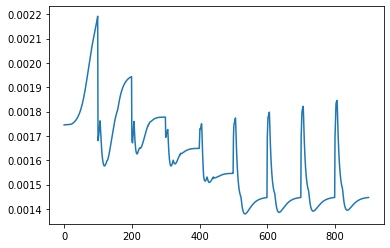

In [313]:
plt.plot(mse_elastic_array)

In [318]:
elastic_net_model = sklearn.linear_model.MultiTaskElasticNet(
    alpha=elastic_net.alpha_,
    l1_ratio=0.5,
    normalize=True
)
elastic_net_model = elastic_net_model.fit(X,y)

In [315]:
elastic_net_model

MultiTaskElasticNet(alpha=0.0027326813404801903, normalize=True)

In [320]:
###using normal linear regression
mae_array = []
for train_index, test_index in kfolds.split(X):
    print(train_index, test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    lm = sklearn.linear_model.LinearRegression().fit(X_train,y_train)
    predict = lm.predict(X_test)
    mae = sklearn.metrics.mean_absolute_error(y_test, predict)
    mae_array.append(mae)
    mae_np = np.array(mae_array)
    average_mae = mae_np.mean()

[1 2 3] [0]
[0 2 3] [1]
[0 1 3] [2]
[0 1 2] [3]


In [321]:
mae_np = np.array(mae_array)

In [322]:
mae_np.mean()

0.03182770300341989

In [323]:
lm = sklearn.linear_model.LinearRegression().fit(X,y)

In [324]:
lm.score(X,y)

1.0

In [325]:
df

,Year,State,D-Polls,R-Polls,Other-Polls,D-Actual,R-Actual,Turnout,D%,R%,Turnout%
0,2004,Wisconsin,0.460,0.490,0.050,1489504.0,1478120.0,2997007.0,0.496997,0.493199,0.7290
1,2008,Wisconsin,0.528,0.418,0.054,1677211.0,1262393.0,2983417.0,0.562178,0.423137,0.6920
2,2012,Wisconsin,0.504,0.462,0.034,1620985.0,1407966.0,3068434.0,0.528278,0.458855,0.7035
3,2016,Wisconsin,0.468,0.403,0.129,1382536.0,1405284.0,2976150.0,0.464538,0.472182,0.6734
4,2020,Wisconsin,0.500,0.439,0.061,NaN,NaN,NaN,NaN,NaN,NaN


In [293]:
df_2020 = df.iloc[-1:,:]

In [294]:
df_2020 = df_2020.loc[df_2020.index.repeat(5)]

In [295]:
col = pd.Series([0.67, 0.69, 0.71, 0.73, 0.75])

In [296]:
df_2020.reset_index(drop=True, inplace=True)

In [297]:
df_2020['Turnout%'] = col

In [298]:
df_2020

,Year,State,D-Polls,R-Polls,Other-Polls,D-Actual,R-Actual,Turnout,D%,R%,Turnout%
0,2020,Wisconsin,0.5,0.439,0.061,NaN,NaN,NaN,NaN,NaN,0.67
1,2020,Wisconsin,0.5,0.439,0.061,NaN,NaN,NaN,NaN,NaN,0.69
2,2020,Wisconsin,0.5,0.439,0.061,NaN,NaN,NaN,NaN,NaN,0.71
3,2020,Wisconsin,0.5,0.439,0.061,NaN,NaN,NaN,NaN,NaN,0.73
4,2020,Wisconsin,0.5,0.439,0.061,NaN,NaN,NaN,NaN,NaN,0.75


In [299]:
X_2020 = df_2020[['D-Polls', 'R-Polls', 'Other-Polls','Turnout%']]
y_2020 = df_2020[['D%', 'R%']]

In [328]:
y_predict = elastic_net_model.predict(X_2020)

In [330]:
df_2020[['D-Actual', 'R-Actual']] = y_predict

In [333]:
df_2020.drop(['Turnout', 'D%', 'R%'], axis=1)

,Year,State,D-Polls,R-Polls,Other-Polls,D-Actual,R-Actual,Turnout%
0,2020,Wisconsin,0.5,0.439,0.061,0.514135,0.448654,0.67
1,2020,Wisconsin,0.5,0.439,0.061,0.521339,0.452231,0.69
2,2020,Wisconsin,0.5,0.439,0.061,0.528543,0.455807,0.71
3,2020,Wisconsin,0.5,0.439,0.061,0.535747,0.459383,0.73
4,2020,Wisconsin,0.5,0.439,0.061,0.542952,0.462960,0.75


In [327]:
lm.predict(X_2020)

array([[0.48385547, 0.46896504],
       [0.51365052, 0.45732557],
       [0.54344557, 0.44568609],
       [0.57324063, 0.43404661],
       [0.60303568, 0.42240714]])